In [4]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

import pandas as pd

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [5]:
mammals = pd.read_csv('../extras/mammals.csv', sep = ',')

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)

In [12]:
mammals.head()

,name,water,protein,fat,lactose,ash
0,Horse,90.1,2.6,1.0,6.9,0.35
1,Orangutan,88.5,1.4,3.5,6.0,0.24
2,Monkey,88.4,2.2,2.7,6.4,0.18
3,Donkey,90.3,1.7,1.4,6.2,0.40
4,Hippo,90.4,0.6,4.5,4.4,0.10


In [19]:
col_names = list(mammals.columns)
col_names.remove('name')

mammals_data = mammals[col_names]

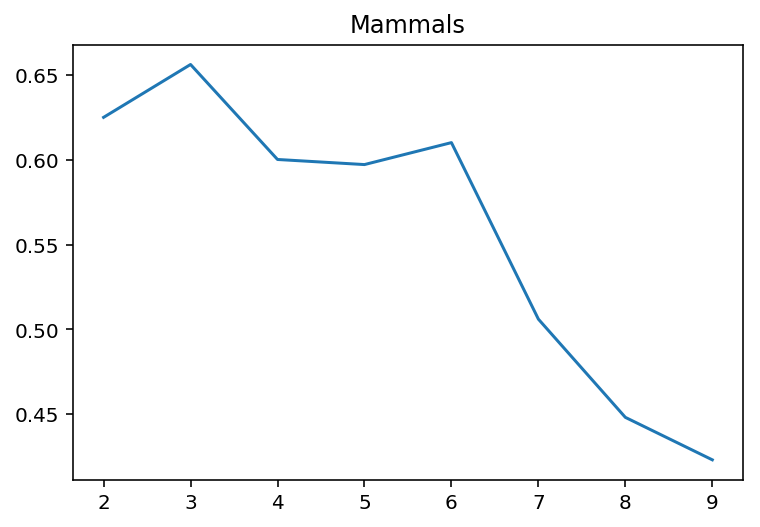

In [21]:
plot_sillhouette(mammals_data, 'Mammals')

In [22]:
kmeans = KMeans(n_clusters = 3, n_init = 10).fit(mammals_data)
kmeans.cluster_centers_

array([[69.47142857,  9.51428571, 16.28571429,  2.92857143,  1.31142857],
       [86.0625    ,  4.275     ,  4.175     ,  5.11875   ,  0.635625  ],
       [45.65      , 10.15      , 38.45      ,  0.45      ,  0.69      ]])

In [23]:
clust = kmeans.predict(mammals_data)

for i in range(max(clust) + 1):
    print ("Cluster", i)
    print (mammals["name"][clust == i])

Cluster 0
16         Dog
17    Elephant
18      Rabbit
19         Rat
20        Deer
21    Reindeer
22       Whale
Name: name, dtype: object
Cluster 1
0          Horse
1      Orangutan
2         Monkey
3         Donkey
4          Hippo
5          Camel
6          Bison
7        Buffalo
8     Guinea Pig
9            Cat
10           Fox
11         Llama
12          Mule
13           Pig
14         Zebra
15         Sheep
Name: name, dtype: object
Cluster 2
23       Seal
24    Dolphin
Name: name, dtype: object
